1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

2. Generate synthetic data

true function:  f(x) = x · sin(x)  + noise

In [2]:
rng = np.random.RandomState(2)
X_train = rng.uniform(0, 10, 20).reshape(-1, 1)   # 20 random inputs
y_train = (X_train[:, 0] * np.sin(X_train[:, 0])
           + rng.normal(0, 0.3, size=20))          # add noise


3. Define the kernel

RBF = smooth function  +  WhiteKernel = noise term

In [3]:
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)


4. Fit the Gaussian-process model

In [4]:
gpr = GaussianProcessRegressor(kernel=kernel,
                               alpha=0.0,   # handled by WhiteKernel
                               normalize_y=True)
gpr.fit(X_train, y_train)
print("Learned kernel:", gpr.kernel_)

Learned kernel: 1.09**2 * RBF(length_scale=1.55) + WhiteKernel(noise_level=0.00531)


5. Predict on a fine grid (with uncertainty)

In [5]:
X_plot = np.linspace(0, 10, 500).reshape(-1, 1)
y_mean, y_std = gpr.predict(X_plot, return_std=True)

6. Visualise

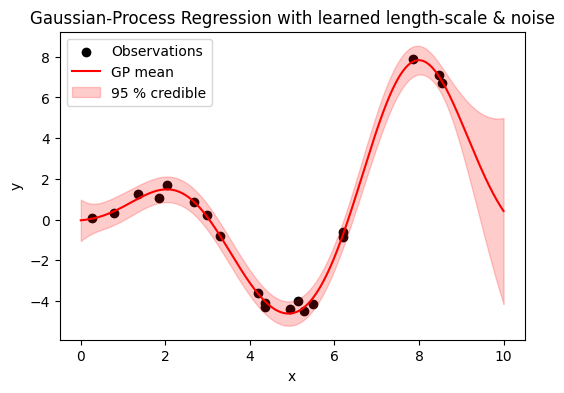

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, c='k', label='Observations')
plt.plot(X_plot, y_mean, 'r', label='GP mean')
plt.fill_between(X_plot[:, 0],
                 y_mean - 1.96*y_std,
                 y_mean + 1.96*y_std,
                 color='red', alpha=0.2, label='95 % credible')
plt.legend(); plt.xlabel("x"); plt.ylabel("y")
plt.title("Gaussian-Process Regression with learned length-scale & noise")
plt.show()